In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcl
import seaborn as sns
import plotly.express as px
from matplotlib.colors import LinearSegmentedColormap
import numpy as np

In [2]:
data_2010s = pd.read_csv('dataset/dataset-of-10s.csv')
data_2000s = pd.read_csv('dataset/dataset-of-00s.csv')
data_1990s = pd.read_csv('dataset/dataset-of-90s.csv')
data_1980s = pd.read_csv('dataset/dataset-of-80s.csv')

In [3]:
data_2010s.isnull().sum()

track               0
artist              0
uri                 0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
chorus_hit          0
sections            0
target              0
dtype: int64

In [4]:
data_2000s.isnull().sum()

track               0
artist              0
uri                 0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
chorus_hit          0
sections            0
target              0
dtype: int64

In [5]:
data_1990s.isnull().sum()

track               0
artist              0
uri                 0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
chorus_hit          0
sections            0
target              0
dtype: int64

In [6]:
data_1980s.isnull().sum()

track               0
artist              0
uri                 0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
chorus_hit          0
sections            0
target              0
dtype: int64

In [7]:
data_2010s["year"] = 2010
data_2000s["year"] = 2000
data_1990s["year"] = 1990
data_1980s["year"] = 1980

In [8]:
df_list = [data_2010s, data_2000s, data_1990s, data_1980s]
data = pd.concat(df_list)

In [9]:
data["duration_s"] = data["duration_ms"]/1000

In [10]:
data.columns

Index(['track', 'artist', 'uri', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature', 'chorus_hit',
       'sections', 'target', 'year', 'duration_s'],
      dtype='object')

In [11]:
data_description = data.describe()

In [12]:
hits = data[data["target"] == 1]
flop = data[data["target"] == 0]

In [13]:
hits_description = hits.describe()
flop_description = flop.describe()

In [14]:
var_list = ['danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'chorus_hit', 'duration_s']

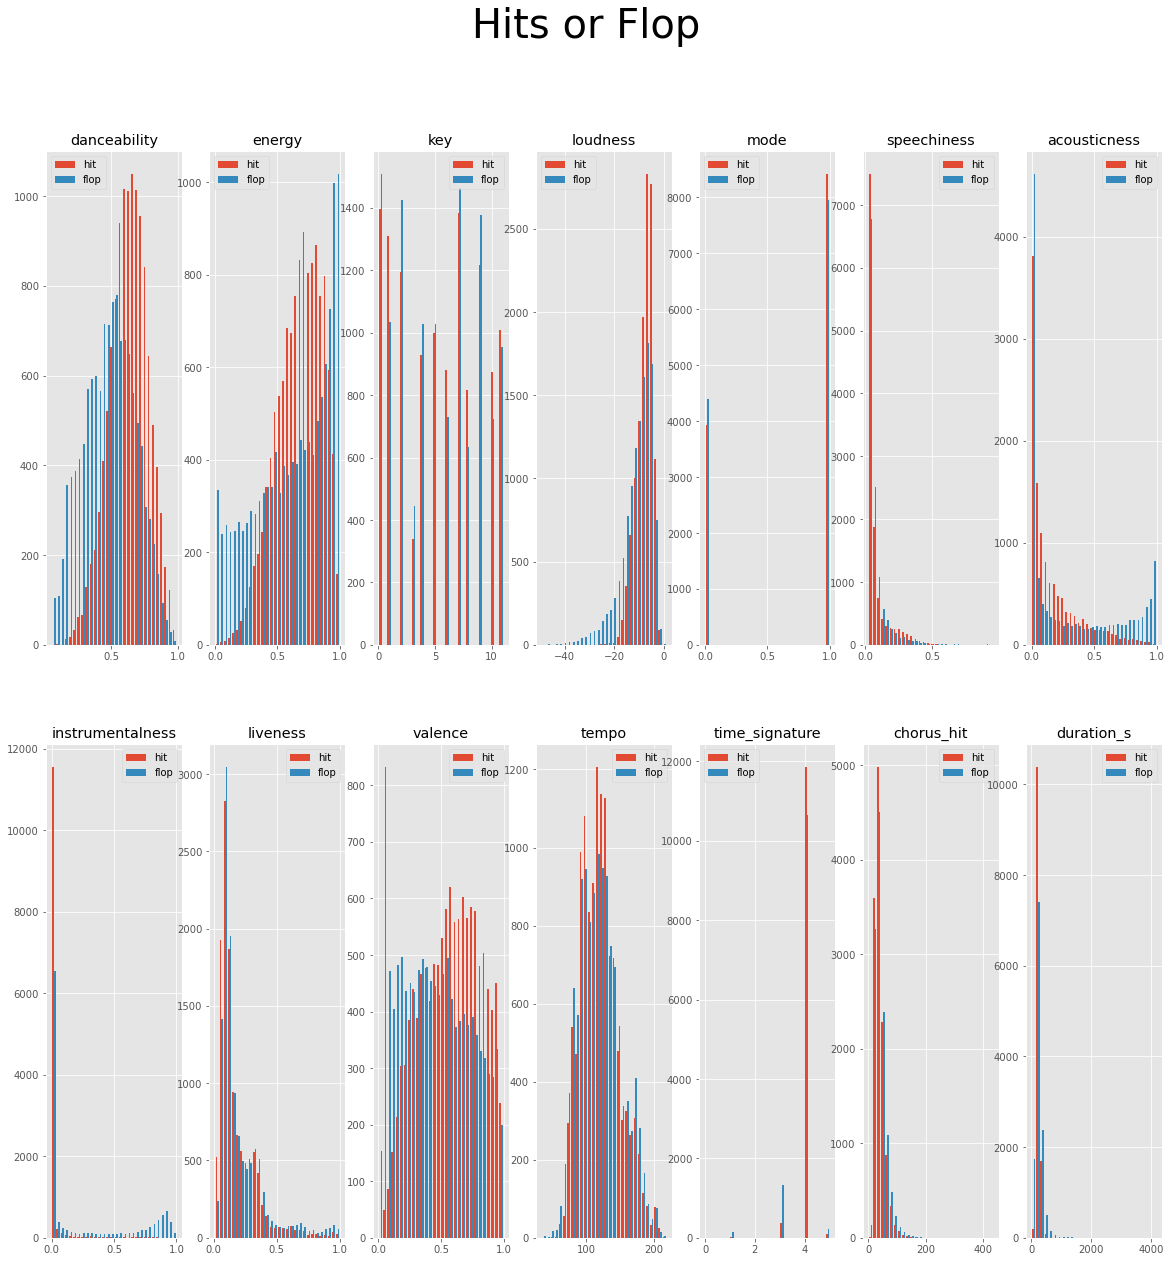

In [15]:
plt.style.use('ggplot')
fig, ax = plt.subplots(2, 7, figsize=(20, 20))
fig.suptitle('Hits or Flop', fontsize=40)

column_idx = 0
for i in range(2):
    for j in range(7):
        ax[i][j].hist([hits[var_list[column_idx]], flop[var_list[column_idx]]], bins=30, label=['hit', 'flop'])
        ax[i][j].set_title(var_list[column_idx])
        ax[i][j].legend()
        column_idx += 1
        
plt.savefig('image.png', facecolor='white')

In [16]:
h = 24
s = 0.99
v = 1
 
colors = [
    mcl.hsv_to_rgb((h/360,0,v)),
    mcl.hsv_to_rgb((h/360,0.5,v)),
    mcl.hsv_to_rgb((h/360,1,v))
]
cmap = LinearSegmentedColormap.from_list('my_cmap',colors,gamma=3)

In [17]:
data_corr = data.drop(['duration_ms'], axis=1)

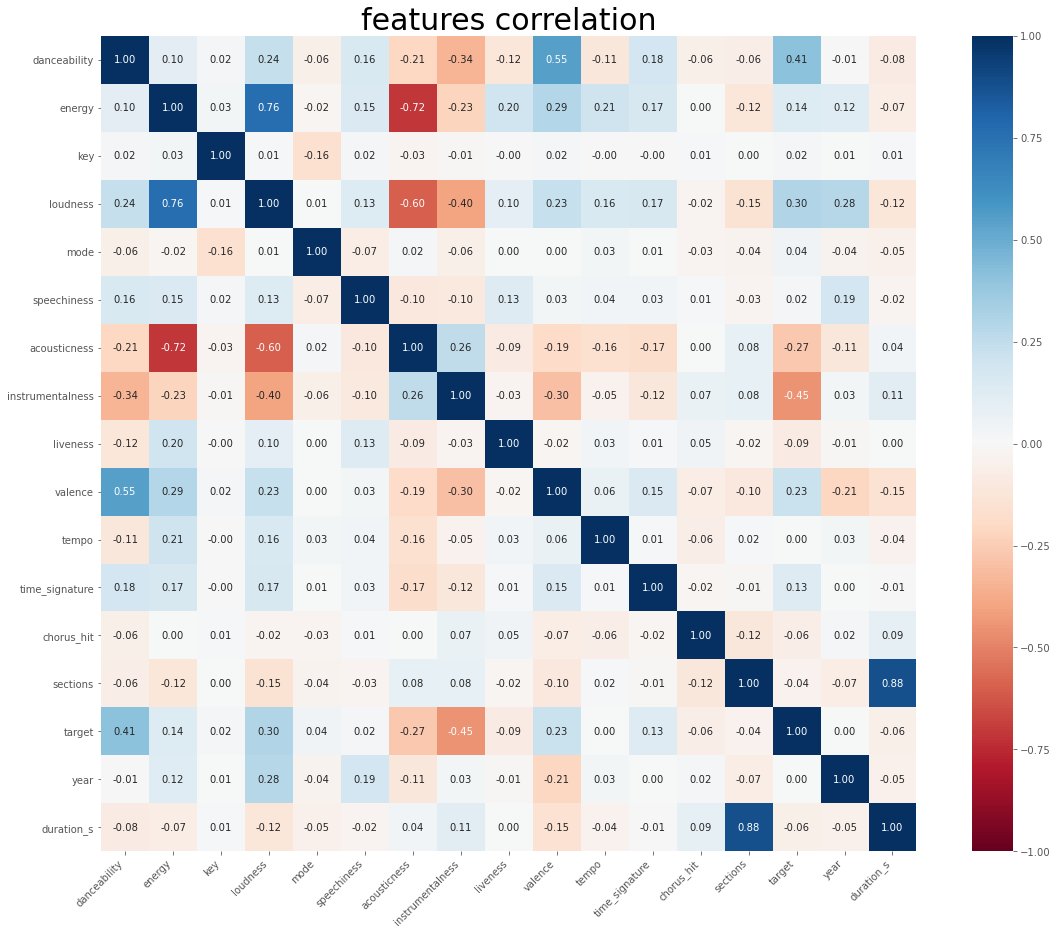

In [21]:
corr = data_corr.corr()
# plt.style.use('ggplot')
plt.figure(figsize=(20, 15))
ax = sns.heatmap(corr, vmin=-1, vmax=1, center=0, square=True, cmap='RdBu', annot=True, fmt='.2f')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title('features correlation', fontsize=30)
plt.show();

In [ ]:
# boxplot or violinplot 그리기

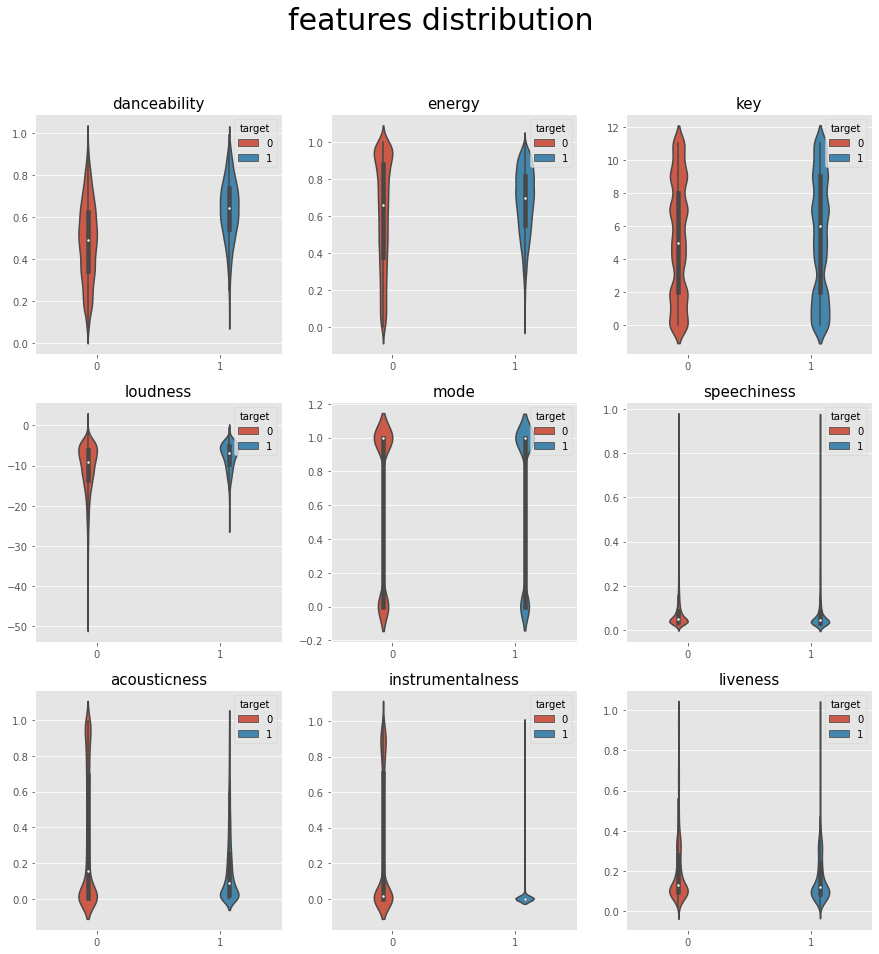

In [39]:
fig, axes = plt.subplots(3, 3, figsize = (15, 15))
fig.suptitle('features distribution', fontsize = 30)
# plt.style.use('ggplot')

column_idx = 0
for i in range(3):
  for j in range(3):
    sns.violinplot(x = data['target'], y = data[var_list[column_idx]], hue = data['target'], notch = True, width = 0.3, ax = axes[i][j]).set_title(var_list[column_idx], fontsize = 15)
    axes[i][j].set_xlabel('')
    axes[i][j].set_ylabel('')
    column_idx += 1

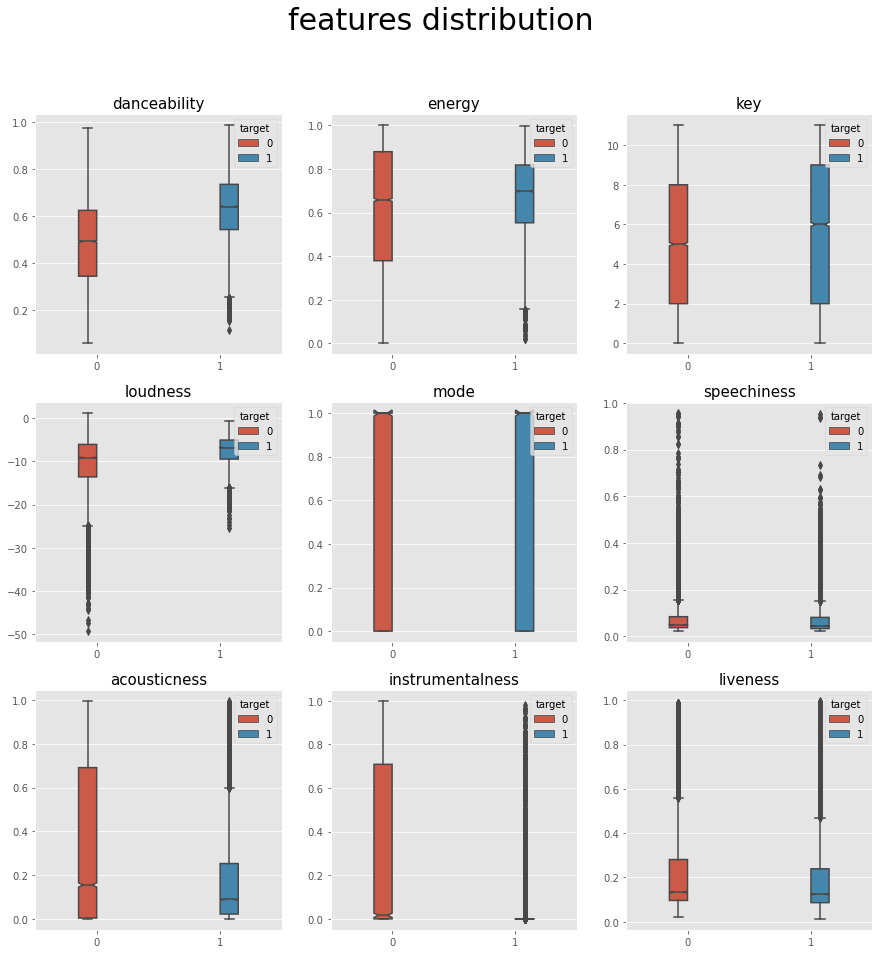

In [40]:
fig, axes = plt.subplots(3, 3, figsize = (15, 15))
fig.suptitle('features distribution', fontsize = 30)
# plt.style.use('ggplot')

column_idx = 0
for i in range(3):
  for j in range(3):
    sns.boxplot(x = data['target'], y = data[var_list[column_idx]], hue = data['target'], notch = True, width = 0.3, ax = axes[i][j]).set_title(var_list[column_idx], fontsize = 15)
    axes[i][j].set_xlabel('')
    axes[i][j].set_ylabel('')
    column_idx += 1

In [ ]:
# 가수 이름 전처리

In [54]:
artist_hits= hits.groupby('artist')['track'].agg(len).sort_values(ascending = False)

In [57]:
hits.groupby('artist')['track'].agg(len).sort_values(ascending = False).plot(kind='bar')

<AxesSubplot:xlabel='artist'>

ValueError: 
Pitbull Featuring Trina & Young Bo$$
                                  ^
Expected end of text, found '$'  (at char 34), (line:1, col:35)

<Figure size 432x288 with 1 Axes>

In [59]:
hits_copy = hits.copy()

In [60]:
hits_copy['artist'].replace('$', 'S')

0                         Alessia Cara
2                         Lukas Graham
4       Zay Hilfigerrr & Zayion McCall
5                        Avril Lavigne
7                             Ludacris
                     ...              
6900                       Paula Abdul
6902                       Rod Stewart
6905                 Teddy Pendergrass
6906                    Boys Don't Cry
6907                        Billy Idol
Name: artist, Length: 12349, dtype: object

In [61]:
sns.countplot(hits_copy['artist'])

/Users/sol/miniforge3/envs/m1/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='artist', ylabel='count'>

ValueError: 
Pitbull Featuring Trina & Young Bo$$
                                  ^
Expected end of text, found '$'  (at char 34), (line:1, col:35)

<Figure size 432x288 with 1 Axes>

In [55]:
plt.bar(artist_hits)

TypeError: bar() missing 1 required positional argument: 'height'

In [41]:
hits.groupby('artist')['track'].agg(len).sort_values(ascending = False)

artist
Madonna                                             53
Glee Cast                                           52
Taylor Swift                                        52
Drake                                               51
Tim McGraw                                          45
                                                    ..
Jennifer Lopez Featuring Big Pun & Fat Joe           1
Jennifer Lopez Featuring DJ Khaled & Cardi B         1
Jennifer Lopez Featuring Fat Joe                     1
Jennifer Lopez Featuring Iggy Azalea Or Pitbull      1
will.i.am Featuring Mick Jagger & Jennifer Lopez     1
Name: track, Length: 4934, dtype: int64

In [43]:
hits.groupby('artist').sort_values(ascending = False)

AttributeError: 'DataFrameGroupBy' object has no attribute 'sort_values'

In [44]:
hits.sort_values(by=['artist'] ,ascending=False)

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,...,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target,year,duration_s
4325,T.H.E (The Hardest Ever),will.i.am Featuring Mick Jagger & Jennifer Lopez,spotify:track:5sn8kTcYEFZ0QcnYKEi9Qc,0.589,0.694,9,-4.847,1,0.0706,0.11200,...,0.0274,0.452,105.993,287973,4,26.55015,15,1,2010,287.973
2730,#thatPOWER,will.i.am Featuring Justin Bieber,spotify:track:01TuObJVd7owWchVRuQbQw,0.797,0.608,6,-6.096,0,0.0583,0.00112,...,0.0748,0.403,128.000,279507,4,29.91553,12,1,2010,279.507
352,Check It Out,will.i.am & Nicki Minaj,spotify:track:5tMoj9U1ZAJ3pOMndaShr7,0.849,0.657,1,-5.124,1,0.0599,0.06010,...,0.1210,0.741,130.107,252027,4,29.82418,10,1,2010,252.027
2496,Scream & Shout,will.i.am & Britney Spears,spotify:track:2iJuuzV8P9Yz0VSurttIV5,0.772,0.685,5,-6.849,1,0.0696,0.01900,...,0.1310,0.501,130.033,283400,4,46.77896,12,1,2010,283.400
1394,I Got It From My Mama,will.i.am,spotify:track:2q2pZHWEQe6w9PgACCzMtC,0.888,0.777,6,-6.262,1,0.0505,0.09610,...,0.0514,0.876,118.998,241520,4,24.27560,12,1,2000,241.520
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350,Word Crimes,"""Weird Al"" Yankovic",spotify:track:4JqQWAr47pGEoaMArpA7Z3,0.897,0.430,7,-12.759,1,0.0551,0.01180,...,0.0473,0.964,121.987,223120,4,34.48070,13,1,2010,223.120
1779,Eat It,"""Weird Al"" Yankovic",spotify:track:0WuYuWhLws8VahMy2zLLRJ,0.767,0.811,7,-8.548,1,0.0766,0.08660,...,0.0684,0.858,147.423,200627,4,29.07256,7,1,1980,200.627
764,Smells Like Nirvana,"""Weird Al"" Yankovic",spotify:track:5Q1qSEtljHQzUygQTt0Ykw,0.591,0.786,6,-7.664,1,0.0749,0.16200,...,0.2800,0.729,120.762,224533,4,16.54714,10,1,1990,224.533
1870,Like A Surgeon,"""Weird Al"" Yankovic",spotify:track:3XhyafaTVD6ViaRFIL4bNo,0.838,0.671,3,-8.328,0,0.0346,0.25200,...,0.0560,0.961,126.012,210627,4,26.18621,11,1,1980,210.627


In [ ]:
a['artist'].value_counts

In [ ]:
# 섹션 eda